## Импорт библиотек

In [180]:
import happybase
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
%matplotlib inline

## Подключение в HBase

In [109]:
connection = happybase.Connection(host='89.208.221.132', port=9090, autoconnect=True)
table = connection.table('student4_6')
connection.open()

## Скачивание таблицы БД

In [110]:
cron = []
for key, data in table.scan():
    cron.append(data)

connection.close()

## Создание DataFrame

In [111]:
df = pd.DataFrame(cron)

In [112]:
print(df.shape)
df.head(3)

(285, 1)


,b'Cron:payload'
0,b'Jul 2 16:01:01 node1 CROND[18436]: (root) C...
1,b'Jul 2 16:01:01 node1 run-parts(/etc/cron.ho...
2,b'Jul 2 16:01:01 node1 run-parts(/etc/cron.ho...


In [113]:
df = df.rename(columns={list(df)[0]: "t"})

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 1 columns):
t    285 non-null object
dtypes: object(1)
memory usage: 2.4+ KB


In [115]:
def change_values(val):
    """изменение"""
    val = str(val)
    val = val.replace('b', '')
    val = val.replace("'", "")
    return val

## Разделение на столбцы

In [116]:
df = df.t.apply(change_values).str.split(expand=True)

In [117]:
df.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11
282,Jul,5,18:01:01,node1,run-parts(/etc/cron.hourly)[15374]:,starting,0anacron,None,None,None,None,None
283,Jul,5,18:01:01,node1,run-parts(/etc/cron.hourly)[15383]:,finished,0anacron,None,None,None,None,None
284,Jul,5,18:30:01,node1,CROND[30776]:,(yarn),CMD,(sh,/tmp/update.sh,>/dev/null,2>&1),None


In [118]:
a = df.values[:, 0].copy()
for j in range(1, 3):
    a += ' ' + df.values[:, j]
pd.Series(a)

df['time'] = a

In [119]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,time
0,Jul,2,16:01:01,node1,CROND[18436]:,(root),CMD,(run-parts,/etc/cron.hourly),None,None,None,Jul 2 16:01:01
1,Jul,2,16:01:01,node1,run-parts(/etc/cron.hourly)[18436]:,starting,0anacron,None,None,None,None,None,Jul 2 16:01:01
2,Jul,2,16:01:01,node1,run-parts(/etc/cron.hourly)[18445]:,finished,0anacron,None,None,None,None,None,Jul 2 16:01:01


In [158]:
def replace_2(val):
    val = str(val)
    val = val.replace('Jul ', '2020-07-0')
    return val

replace_2('Jul 2 16:01:01')

'2020-07-02 16:01:01'

In [165]:
# pd.to_datetime(df.time.apply(replace_2))
df.time = pd.to_datetime(df.time.apply(replace_2), errors='ignore')

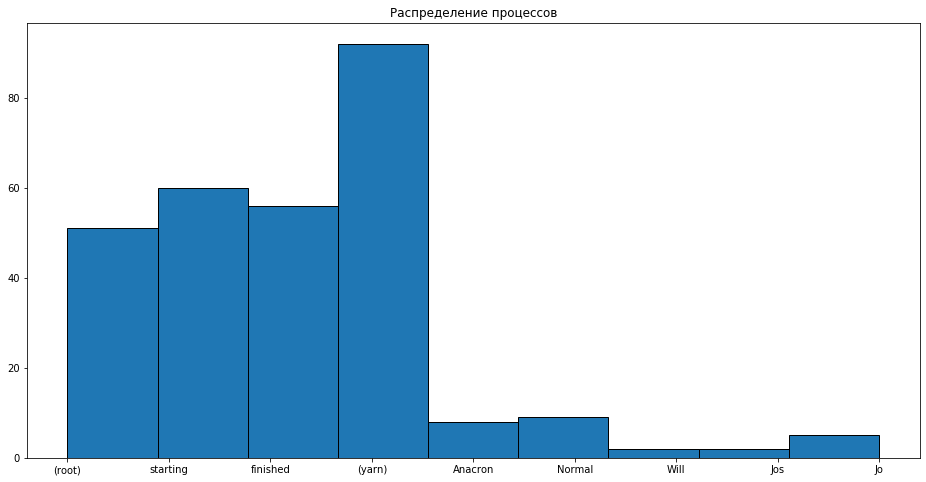

In [184]:
plt.figure(figsize=(16,8))
plt.hist(
    df[5], 
    bins=df[5].nunique(), 
    edgecolor='black',)
plt.title('Распределение процессов')
plt.show()